# Imports of packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import ast
import json

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageDraw

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dropout, Flatten
from tensorflow.keras.layers import Dense





In [9]:
import glob

path = '../animals/train_simplified/' # use your path
all_files = glob.glob(path + "/*.csv")
nb_files = len(all_files)
nb_mots = 47
n_sample_perfile=125000
# nb_lignes_sample=340000
test_size_val=0.20


# Load of the files

I decided to look only to a few classes in this notebook. The dataset contains a total of 340 words. 

The first step to load the files is to read the .csv file and load them in a DataFrame

In [10]:
li = []
count = 0

for filename in all_files[0:nb_mots]:
    print(filename)
    df_reduced = pd.read_csv(filename, index_col=None, header=0, nrows=50000)
    df_reduced = df_reduced[df_reduced['recognized']==True].drop(['timestamp','recognized'], axis=1).sample(n=n_sample_perfile, random_state=24)
    count+=1
    print(df_reduced.size,count ,'/',nb_files)
    li.append(df_reduced)

print('load done for',nb_mots,'files')
frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.sample(n=n_sample_perfile*nb_mots, random_state=24)

del li

../animals/train_simplified/giraffe.csv
40000 1 / 47
../animals/train_simplified/monkey.csv
40000 2 / 47
../animals/train_simplified/bat.csv
40000 3 / 47
../animals/train_simplified/scorpion.csv
40000 4 / 47
../animals/train_simplified/snail.csv
40000 5 / 47
../animals/train_simplified/crocodile.csv
40000 6 / 47
../animals/train_simplified/hedgehog.csv
40000 7 / 47
../animals/train_simplified/snake.csv
40000 8 / 47
../animals/train_simplified/bear.csv
40000 9 / 47
../animals/train_simplified/pig.csv
40000 10 / 47
../animals/train_simplified/squirrel.csv
40000 11 / 47
../animals/train_simplified/cat.csv
40000 12 / 47
../animals/train_simplified/penguin.csv
40000 13 / 47
../animals/train_simplified/mouse.csv
40000 14 / 47
../animals/train_simplified/crab.csv
40000 15 / 47
../animals/train_simplified/frog.csv
40000 16 / 47
../animals/train_simplified/lobster.csv
40000 17 / 47
../animals/train_simplified/shark.csv
40000 18 / 47
../animals/train_simplified/cow.csv
40000 19 / 47
../animals/t

In [11]:
print(frame.shape)
frame.head()

(470000, 4)


,countrycode,drawing,key_id,word
442727,ES,"[[[31, 7, 0, 5, 17, 44], [57, 74, 92, 96, 93, ...",6324594031984640,dolphin
295912,GB,"[[[30, 54, 59, 74, 105, 139, 145, 152, 154, 14...",5223540276068352,bee
133822,US,"[[[161, 161, 148, 129, 104, 84, 78, 64, 61, 76...",6731934547836928,mouse
1924,US,"[[[40, 13, 0, 0, 9, 18, 37, 41, 42, 48, 40, 29...",4540615373094912,giraffe
102708,RU,"[[[7, 9, 15, 22, 28, 26, 17, 10, 6], [28, 44, ...",5834617250643968,squirrel


 #  Data preprocessing:
 
In this section, I replace the words containing spaces by underscores.
I convert then the category into a one hot.

I tried first to use ast.litteral_eval. I changed to json.load which is much faster

In [12]:
#replace spaces in words by _
frame['word'] = frame['word'].str.replace(' ','_')

#transform drawing into arrays (can take some time)
frame['drawing']=frame['drawing'].apply(json.loads)

In [13]:
categories=frame['word'].unique()
print(categories)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(categories)
one_hot_encoded= to_categorical(integer_encoded,dtype='float32')
dict_words_one_hot = dict(zip(categories, one_hot_encoded))
#map one hot incoding in the DataFrame
frame['word_encoded']=frame.word.map(dict_words_one_hot)

['dolphin' 'bee' 'mouse' 'giraffe' 'squirrel' 'ant' 'camel' 'butterfly'
 'cat' 'whale' 'rhinoceros' 'lobster' 'flamingo' 'hedgehog' 'swan'
 'kangaroo' 'shark' 'bear' 'cow' 'rabbit' 'monkey' 'mosquito' 'scorpion'
 'sea_turtle' 'spider' 'raccoon' 'snake' 'panda' 'duck' 'horse' 'parrot'
 'sheep' 'owl' 'bat' 'dog' 'dragon' 'crocodile' 'crab' 'octopus' 'lion'
 'tiger' 'pig' 'frog' 'penguin' 'zebra' 'snail' 'elephant']


In [14]:
frame.head()

,countrycode,drawing,key_id,word,word_encoded
442727,ES,"[[[31, 7, 0, 5, 17, 44], [57, 74, 92, 96, 93, ...",6324594031984640,dolphin,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
295912,GB,"[[[30, 54, 59, 74, 105, 139, 145, 152, 154, 14...",5223540276068352,bee,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
133822,US,"[[[161, 161, 148, 129, 104, 84, 78, 64, 61, 76...",6731934547836928,mouse,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1924,US,"[[[40, 13, 0, 0, 9, 18, 37, 41, 42, 48, 40, 29...",4540615373094912,giraffe,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
102708,RU,"[[[7, 9, 15, 22, 28, 26, 17, 10, 6], [28, 44, ...",5834617250643968,squirrel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Overview of the data

This section is used to see an overview of the drawings, I added the name of each drawing as the legend of the plot

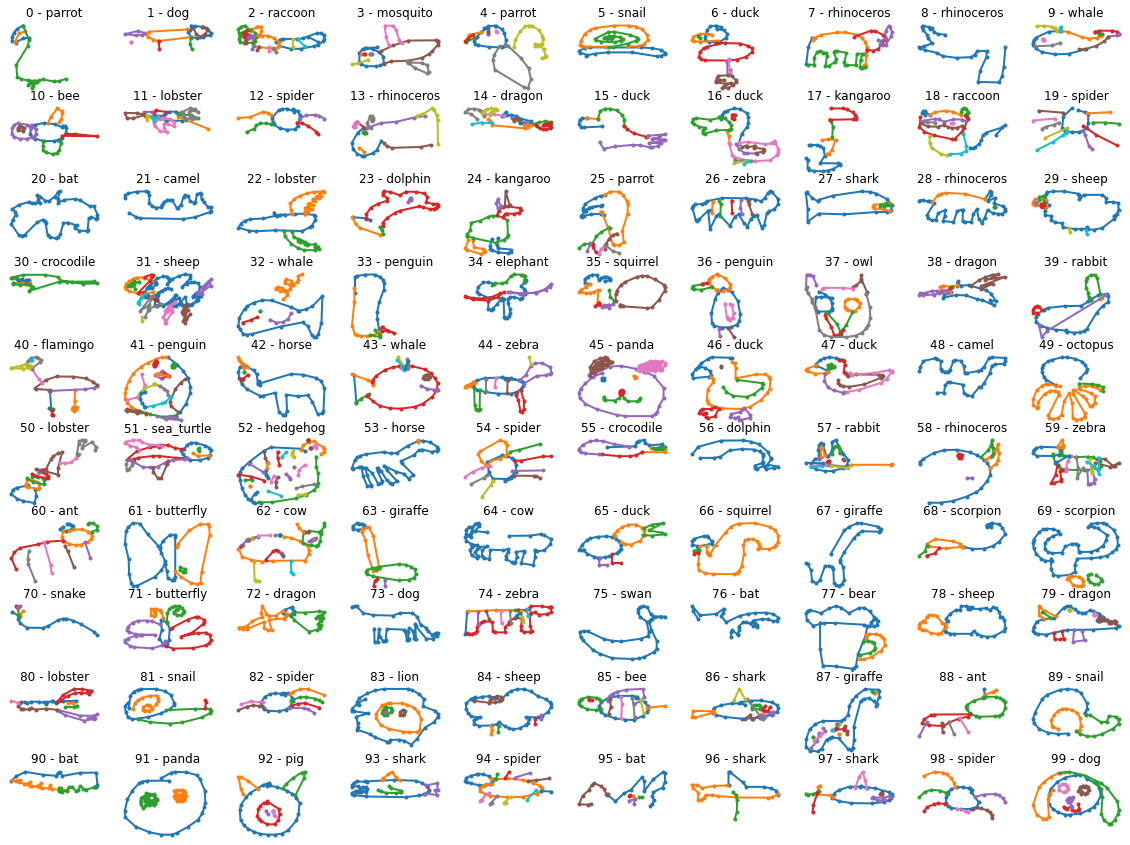

In [15]:
N=10
overview_sample=frame.sample(n=100, random_state=24).reset_index()


fig1, axes = plt.subplots(N,N ,sharex=True, sharey=True, figsize=(20, 15))
for index, rows in enumerate(overview_sample['drawing']):
    word=overview_sample.iloc[index,4]
    ax1 = axes[index // N, index % N]
    
    for x,y in rows:
        
        # -np.array is used to inverse the y-axis here
        ax1.plot(x,-np.array(y),marker='o',markersize=3,linewidth=2)
    ax1.axis('off')
    ax1.set(title=str(index)+' - '+ word)
plt.show()

# Conversions fonctions

Used to convert the drawing into a img in a numpy array 

functions from: https://www.kaggle.com/gaborfodor/how-to-draw-an-owl-lb-0-002

In [16]:
def convert_to_np_raw(drawing, width = 256, height = 256):
    """
    INPUT:
        drawing - drawing in initial format
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        img - drawing converted to the numpy array (28 X 28)
    """
    # initialize empty numpy array
    img = np.zeros((28, 28))
    
    # create a PIL image out of drawing
    pil_img = convert_to_PIL(drawing)
    
    #resize to 28,28
    pil_img.thumbnail((28,28), Image.ANTIALIAS)
    
    pil_img = pil_img.convert('RGB')
    pixels = pil_img.load()
    
    # fill in numpy array with pixel values
    for i in range(0, 28):
        for j in range(0, 28):
            img[i, j] = 1 - pixels[j, i][0] / 255
    
    return img

In [17]:
def convert_to_PIL(drawing, width = 256, height = 256):
    """
    Function to convert from drawing to .
    INPUT:
        drawing - drawing from 'drawing' column
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        pil_img - (PIL Image) image
    """
    
    # initialize empty (white) PIL image
    pil_img = Image.new('RGB', (width, height), 'white')
    pixels = pil_img.load()
            
    draw = ImageDraw.Draw(pil_img)
    
    # draw strokes as lines
    for x,y in drawing:
        for i in range(1, len(x)):
            draw.line((x[i-1], y[i-1], x[i], y[i]), fill=0)
        
    return pil_img

 Then we need to convert the pictures into an np.array to be able to predict them.
 This is currently a bottleneck in the analysis, because the transformation takes a lot of time. The RAM usage is limitating the number of sample used. 
 
 Solution could be to try to parallelize this line.

In [18]:
frame['drawing']=frame['drawing'].apply(convert_to_np_raw)

### Then we create the Train and Test Datasets

I decided to drop all not useful columns, however it could be interessant to consider the countrycode as a feature. Some countries can have similar ways to draw doodles based on their location.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(frame.drop(['countrycode','word','word_encoded','key_id'],axis=1), frame['word_encoded'], test_size=test_size_val, random_state=24)

# Prediction

One of the current limitation in this analysis is the number of samples and the number of words.

# Model 1 - Very basic model but efficient

For this first model, I decided to use a very basic Neural Network using Dense layer with a 'relu' activation. And a softmax activation for the output layer. 

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(nb_mots,activation='softmax'))

I used adam as an 

In [ ]:
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
train_data=X_train['drawing'].apply(lambda v: v.reshape(784))
test_data=X_test['drawing'].apply(lambda v: v.reshape(784))

In [ ]:
#We convert the DF to numpy array
X_train_stacked=np.stack(train_data.values)
y_train_stacked=np.stack(y_train.values)
X_test_stacked=np.stack(test_data.values)
y_test_stacked=np.stack(y_test.values)

I then had to convert the y_train and y_test to numpy array with the right shape so they can be converted by Keras to Tensors

In [ ]:
y_train=np.concatenate( y_train.to_numpy(), axis=0 ).reshape(y_train.shape[0],nb_mots)
y_test=np.concatenate( y_test.to_numpy(), axis=0 ).reshape(y_test.shape[0],nb_mots)

In [ ]:
model.fit(np.stack(train_data.values),y_train, validation_split=0.2, epochs=10)

In [ ]:
model.evaluate(np.stack(test_data.values), y_test_stacked)

> # Model 2 - Conv approach

### First we need to use the right shape for the values for the convolutional network

In [ ]:
#Here the images are reshaped to (28,28,1) array
X_train_new=X_train['drawing'].apply(lambda v: v.reshape(28,28,1))
X_test_new=X_test['drawing'].apply(lambda v: v.reshape(28,28,1))

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(680, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_mots, activation='softmax'))
model2.summary()

In [ ]:
model2.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
model2.fit(np.stack(X_train_new.values),y_train, validation_split=0.2, epochs=5)

In [ ]:
model2.evaluate(np.stack(X_test_new.values),y_test)

# Model 3 - More classic but efficient 

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model3.add(Conv2D(16, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(nb_mots, activation='softmax'))
model3.summary()

In [ ]:
model3.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
model3.fit(np.stack(X_train_new.values),y_train, validation_split=0.2, epochs=5)

In [ ]:
model3.evaluate(np.stack(X_test_new.values),y_test)

# Model 4 - Adding dropout to model 3

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model4.add(Conv2D(16, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Conv2D(32, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Conv2D(64, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(nb_mots, activation='softmax'))
model4.summary()


In [ ]:
model4.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
model4.fit(np.stack(X_train_new.values),y_train, validation_split=0.2, epochs=5)

In [ ]:
model4.evaluate(np.stack(X_test_new.values),y_test)

# Summary

# Next steps to go further:

Several steps that I still want to try to implement: 
- Try to fit the model using more sample: BatchApproach
- Try to parallelize bottleneck steps and apply functions
- Optimization of layers and parameters and number of epoch
- Use pre-models such as MobileNet to check their scores
- Try to use LTSM layers in addition to Conv/Pooling layers